# Credit Card Churn - Supervised learning 

## Data Exporation

The dataset used for analysis is named "credit_card_churn," obtained from https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn. The purpose of studying this dataset is to create a classification model to predict whether bank credit card users will cancel their credit card usage or not.

The "credit_card_churn.csv" dataset consists of 10,127 records with a total of 23 attributes:

1. CLIENTNUM (numerical): Customer identification number
2. Attrition_Flag (target): Customer bank membership status
3. Customer_Age (numerical): Customer's age
4. Gender (categorical): Customer's gender
5. Dependent_count (numerical): Number of dependents
6. Education_Level (categorical): Customer's education level
7. Marital_Status (categorical): Customer's marital status
8. Income_Category (categorical): Customer's income category
9. Card_Category (categorical): Type of card
10. Months_on_book (numerical): Period of relationship with the bank in months
11. Total_Relationship_Count (numerical): Total number of bank services used
12. Months_Inactive_12_mon (numerical): Number of months with no bank transactions in the last 12 months
13. Contacts_Count_12_mon (numerical): Number of bank contacts in the last 12 months
14. Credit_Limit (numerical): Credit limit on the card
15. Total_Revolving_Bal (numerical): Total revolving balance on the card
16. Avg_Open_To_Buy (numerical): Average open to buy credit line (average amount of unused credit)
17. Total_Amt_Chng_Q4_Q1 (numerical): Change in transaction amount over the last four quarters compared to the first quarter
18. Total_Trans_Amt (numerical): Total transaction amount
19. Total_Trans_Ct (numerical): Total number of transactions
20. Total_Ct_Chng_Q4_Q1 (numerical): Change in the number of transactions over the last four quarters compared to the first quarter
21. Avg_Utilization_Ratio (numerical): Average card utilization ratio (amount used divided by credit limit)
22. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 (numerical): Data from performing Naive Bayes Classification
23. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 (numerical): Data from performing Naive Bayes Classificati23

In [129]:
##import lib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [130]:
##read csv
rawDF = pd.read_csv('credit_card_churn.csv')
rawDF.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [131]:
#show df info
rawDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [132]:
col=[n for n in rawDF.columns]
for i in col:
    print('---',i,'---')
    print(rawDF[i].value_counts())
    print("------------------"*5)

--- CLIENTNUM ---
768805383    1
711784908    1
720133908    1
803197833    1
812222208    1
            ..
796903083    1
716014983    1
712521783    1
780045708    1
714337233    1
Name: CLIENTNUM, Length: 10127, dtype: int64
------------------------------------------------------------------------------------------
--- Attrition_Flag ---
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------------------------------------------------------------------
--- Customer_Age ---
44    500
49    495
46    490
45    486
47    479
43    473
48    472
50    452
42    426
51    398
53    387
41    379
52    376
40    361
39    333
54    307
38    303
55    279
56    262
37    260
57    223
36    221
35    184
59    157
58    157
34    146
33    127
60    127
32    106
65    101
61     93
62     93
31     91
26     78
30     70
63     65
29     56
64     43
27     32
28     29
67      4
66      2
68      2
70      1
73      1
Name: Cus

In [133]:
rawDF.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990



The creator has initiated the process of feature selection by removing 3 features:

1. CLIENTNUM: This feature represents the customer identification number and is deemed insignificant for data analysis purposes. 
2. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: This feature is not raw data and should be removed before performing data analysis. 
3. Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: Similar to the previous feature, it is not raw data and should be removed before data analysi23 

In [134]:
#Drop 3 feature
rawDF = rawDF.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

The creator has begun by transforming the initial dataframe into separate dataframes for numerical and categorical data. They have also separated the data and target variables to facilitate further processing in subsequent steps.

In [135]:
#define variable 
target_name = 'Attrition_Flag'

rawDF[target_name] = rawDF[target_name].replace(['Existing Customer','Attrited Customer'],[0,1])

rawDF_data = rawDF.iloc[:,1:]
rawDF_target = rawDF.iloc[:,0]

numDF = rawDF_data.select_dtypes(include=np.number)
numDF_target = pd.concat([numDF,rawDF_target],axis=1)

catDF=rawDF_data.select_dtypes(exclude=np.number)
catDF_target = pd.concat([catDF,rawDF_target],axis=1)

numDF_target.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


### Data Visualization

The creator has performed visualization to analyze the characteristics of the data. The analysis can be summarized as follows:

1.) 
Histogram plots (numerical) for numeric data were created to analyze the distribution of data across different classes. These plots provide insights into the spread and central tendency of numeric features within each class.

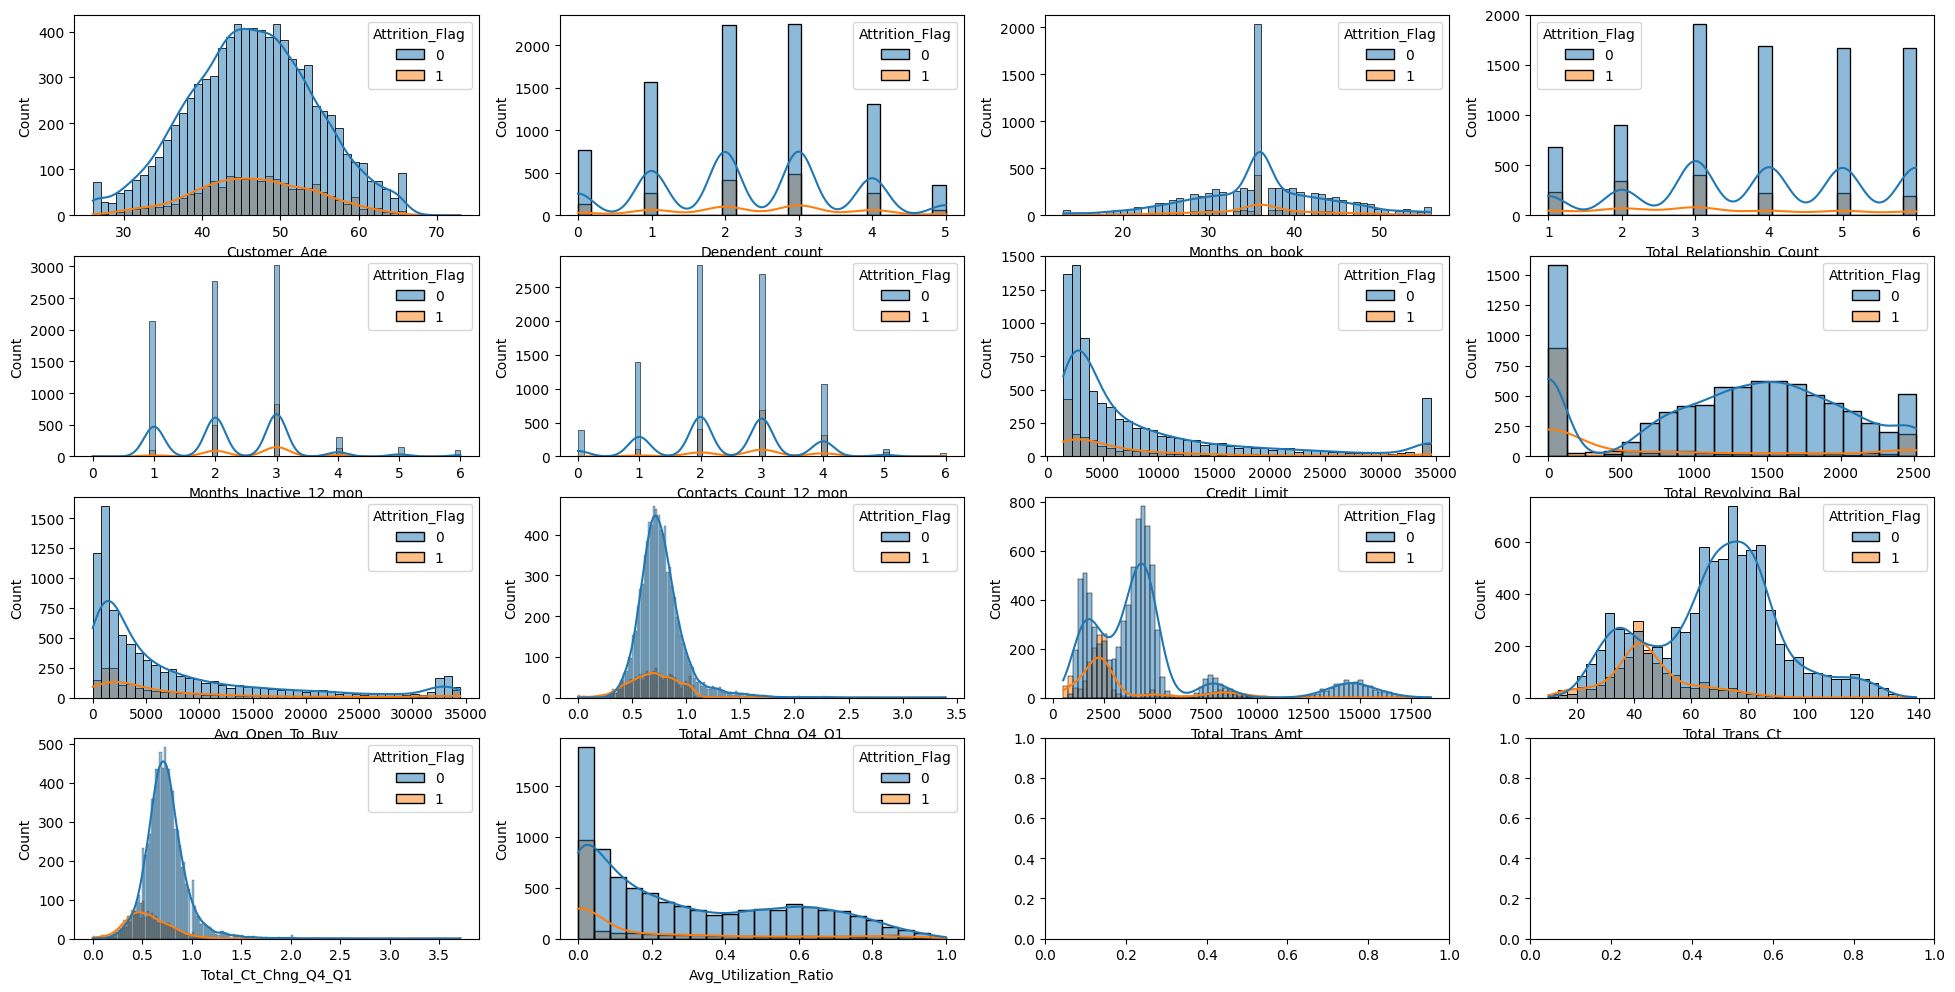

In [136]:
# Histrogram plot
fig,ax = plt.subplots(4,4,figsize=(24,12))
col = numDF_target.columns
for i in range(0,14): 
    sns.histplot(data = numDF_target, x = col[i], kde = True, hue = target_name,ax=ax[floor(i/4)][i%4])

plt.show()

From the histogram plots, it is observed that the majority of features exhibit a normal distribution. However, there are four features that demonstrate a right-skewed distribution:

1. Credit_Limit
2. Avg_Open_To_Buy
3. Total_Trans_Amt
4. Avg_Utilization_Ratio

These features will undergo preprocessing to transform them into a normal distribution in the subsequent steps.

2.) Box plot (numerical) : For the box plot analysis, we can analyze the distribution of the data, the presence of outliers, and the ability of each feature's class to discriminate the target.

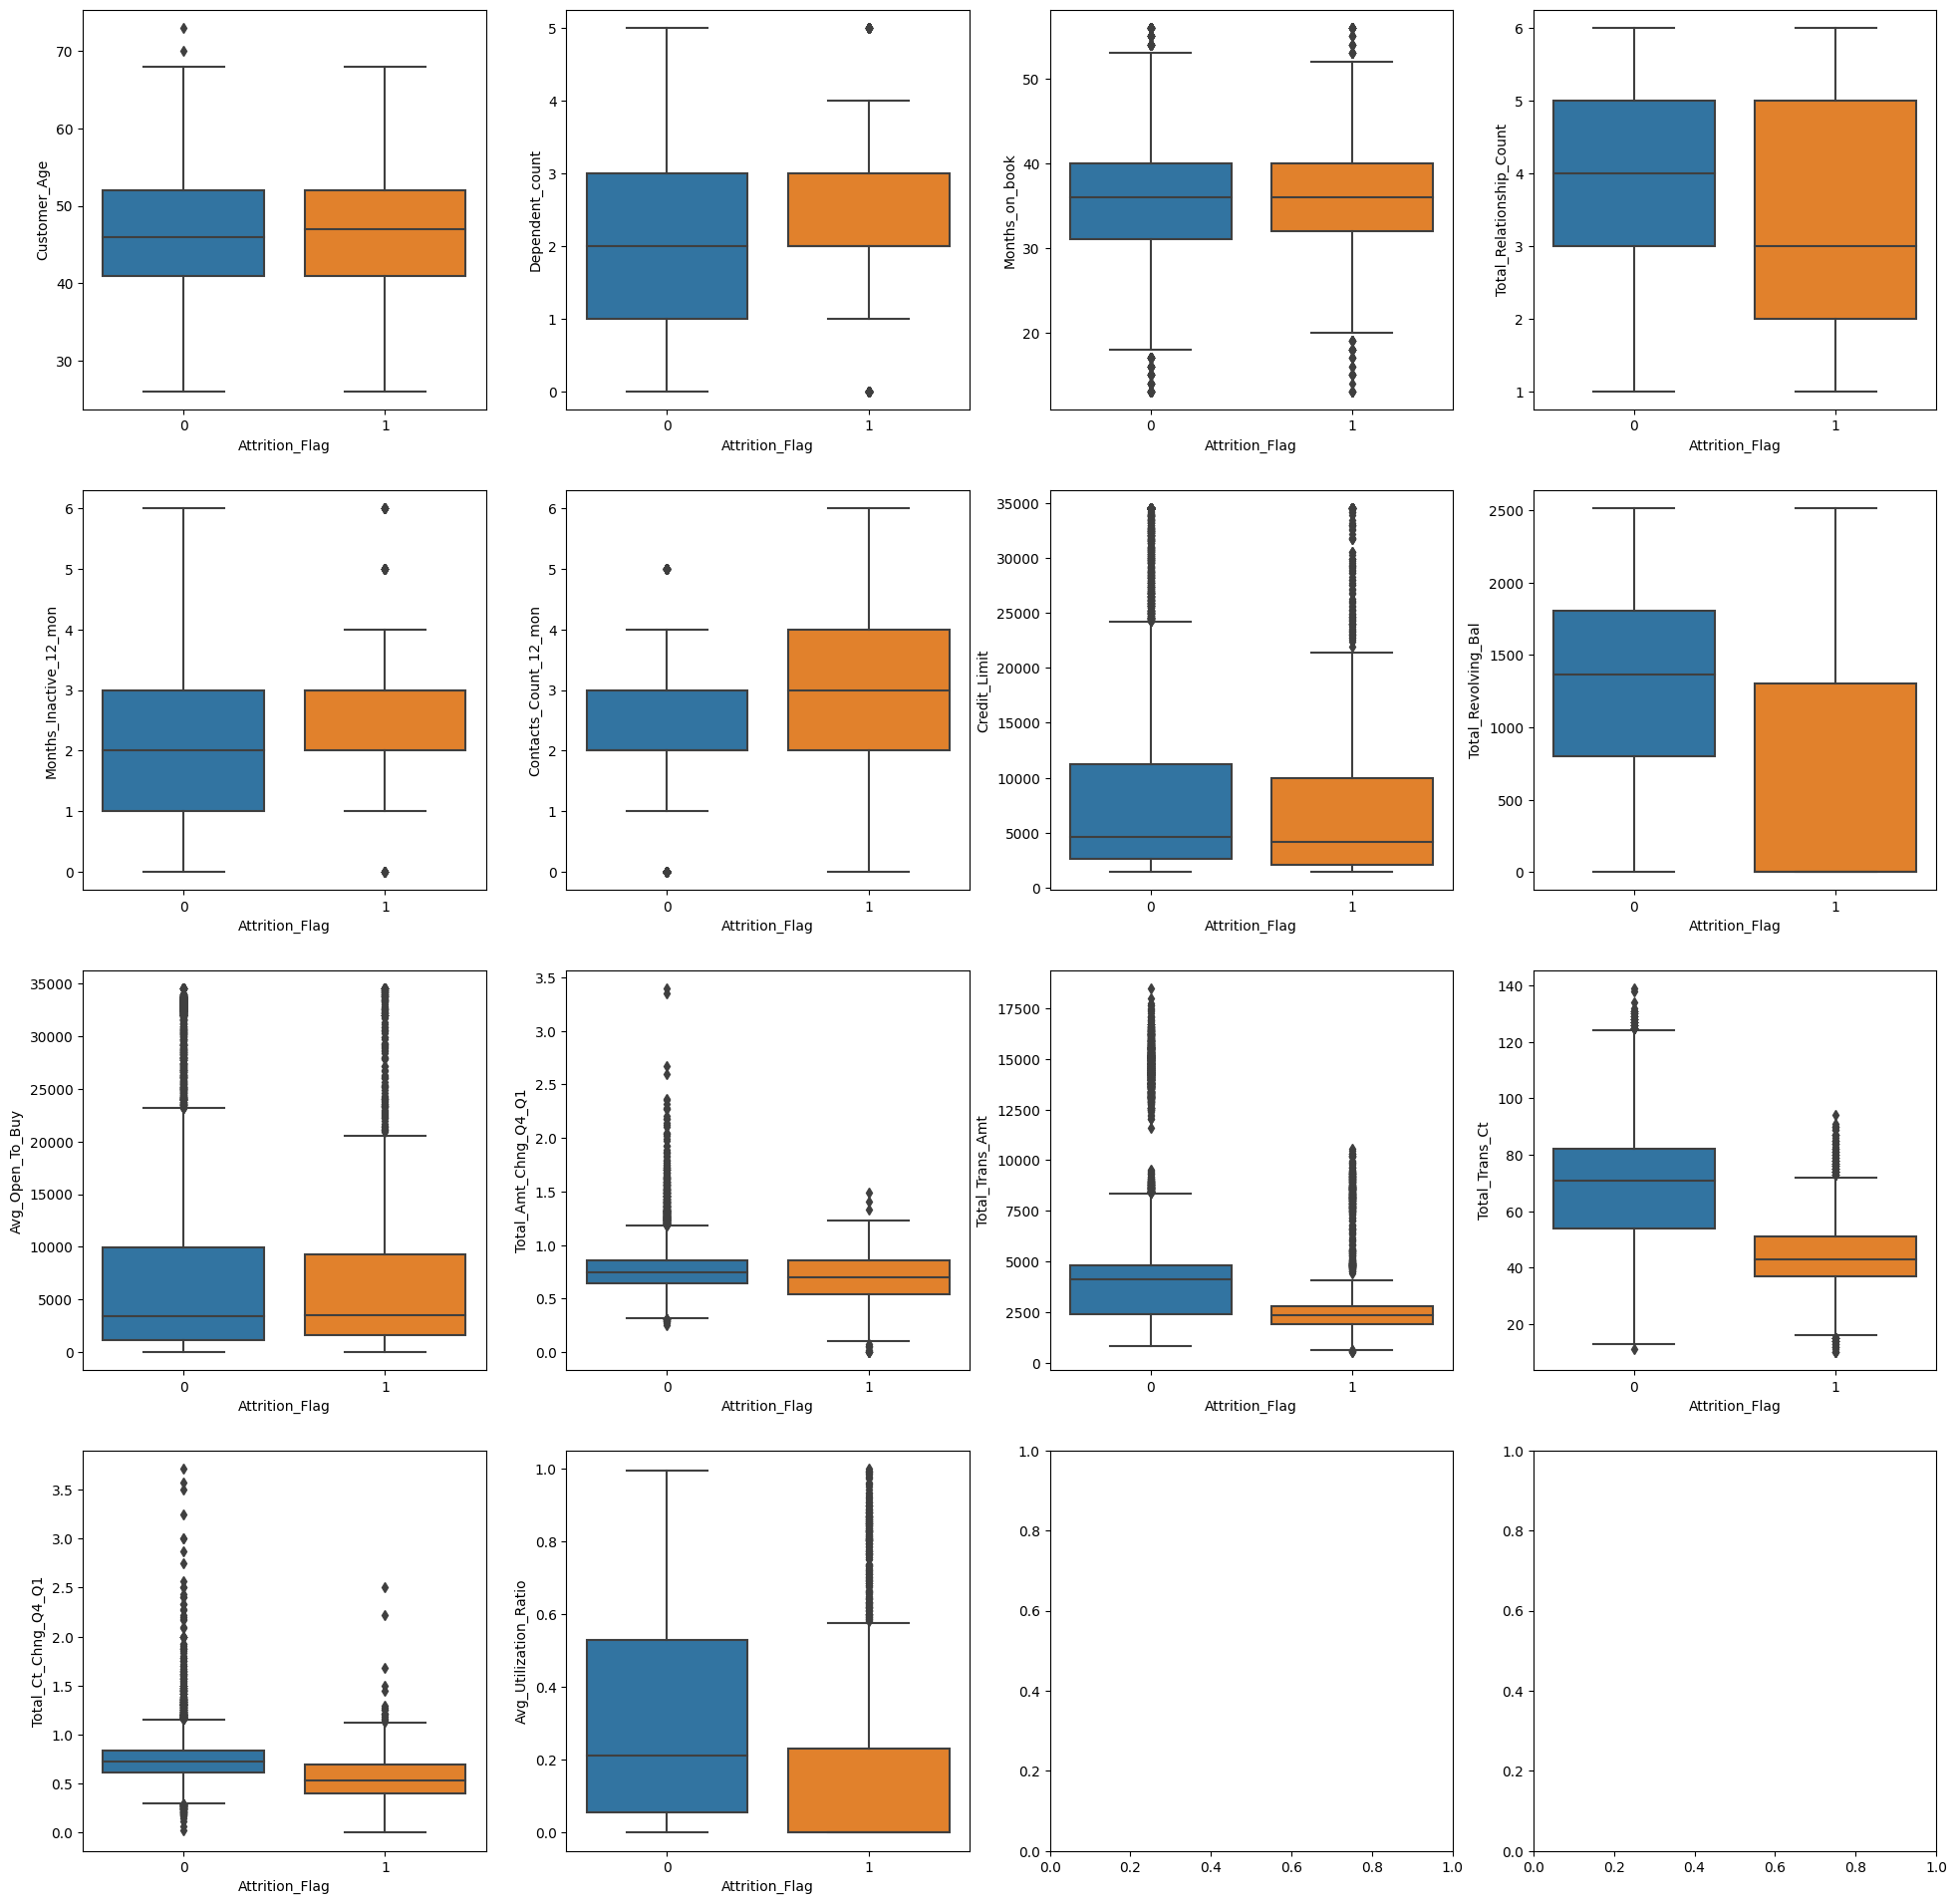

In [137]:
fig,ax = plt.subplots(4,4,figsize=(24,24))
col = numDF_target.columns
for j in range(0,14):
    i = floor(j/4)
    sns.boxplot(data = numDF_target,y = col[j], x = col[-1],ax=ax[i][j%4])
    # sns.boxplot(data = numDF_target,y = col[j],ax=ax[i][j%4])
plt.show()


From the box plot analysis, several features exhibit a relatively high number of outliers. Regarding the ability to discriminate the target class, some features clearly separate the classes, while others show significant overlap. To further investigate this, the next step will involve examining correlations among the features.

3.) Heatmap correlation plot (numeric data) : 
To visualize the relationships between features and between features and the target, correlation plots can be created. Correlation coefficients range from -1 to 1, where values close to 1 or -1 indicate a strong positive or negative correlation, respectively, while values close to 0 indicate weak or no correlation.

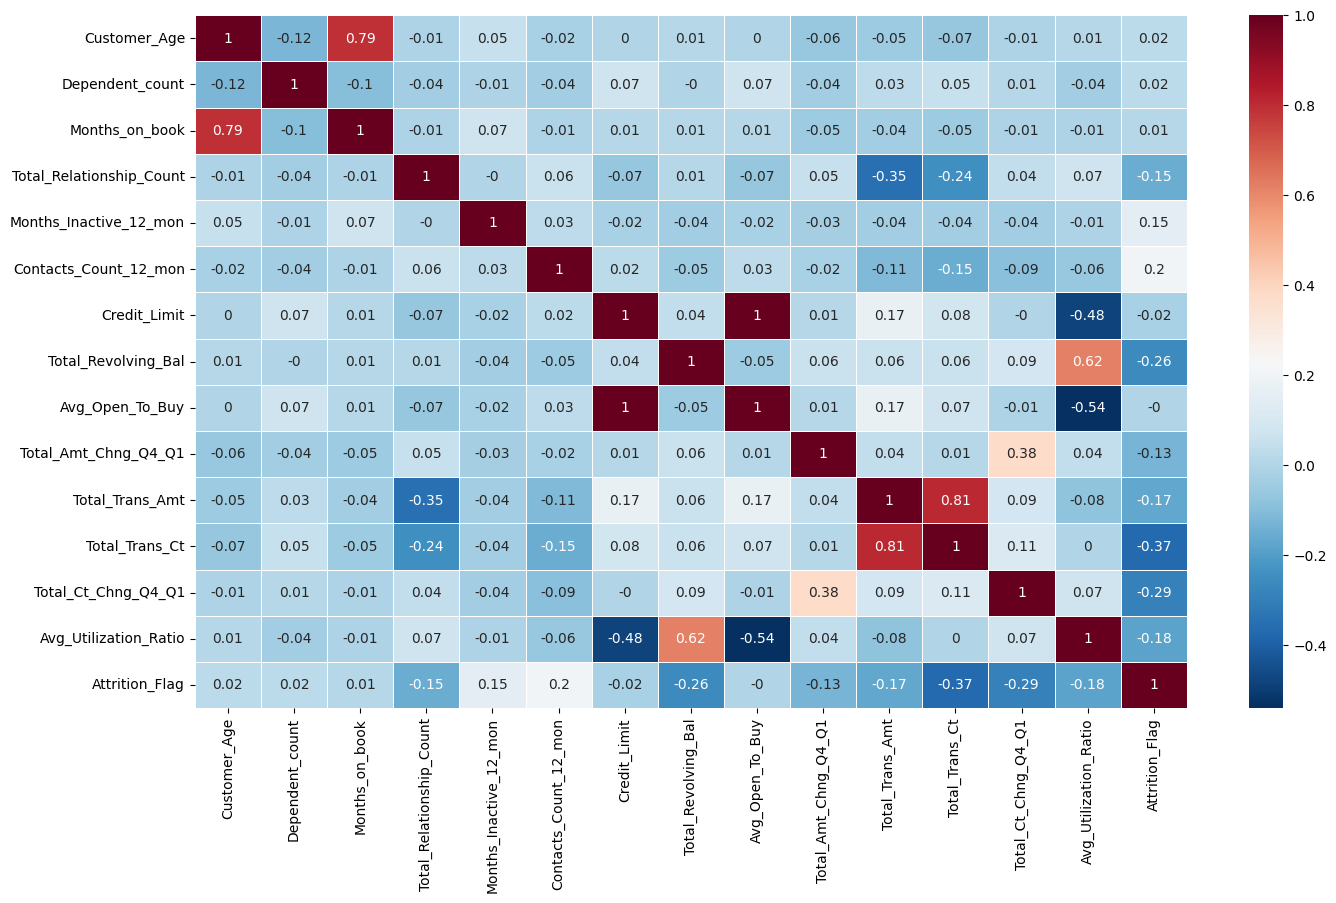

In [138]:
#Heatmap correlation plot
plt.figure(figsize = (16,9))
sns.heatmap(round(numDF_target.corr(),2),annot=True,cmap='RdBu_r', linewidths=.5)
plt.show()

Based on the correlation heatmap analysis:

- Features with high correlation:

    - Avg_Open_To_Buy & Credit_Limit (correlation = 1.00)
    - Total_Trans_Ct & Total_Trans_Amt (correlation = 0.81)
    - Months_on_book & Customer_Age (correlation = 0.79)
    - Avg_Utilization_Ratio & Total_Revolving_Bal (correlation = 0.62)
    - Avg_Utilization_Ratio & Avg_Open_To_Buy (correlation = -0.54)

- Features with low correlation with the target:

    - Customer_Age (correlation = 0.02)
    - Dependent_count (correlation = 0.02)
    - Months_on_book (correlation = 0.01)
    - Credit_Limit (correlation = -0.02)
    - Avg_Open_To_Buy (correlation = 0.00)

Next steps:
- For features with high correlation, further analysis is needed to decide whether to keep both features or drop one of them to avoid multicollinearity issues.
- For features with low correlation with the target, their significance in predicting the target should be evaluated before deciding whether to keep or drop them in the modeling process.

4.) Box plot (less correlate with target feature) : Perform a plot to analyze the ability of the feature class in dividing the target in which manner, in order to decide whether to discard the feature or not.

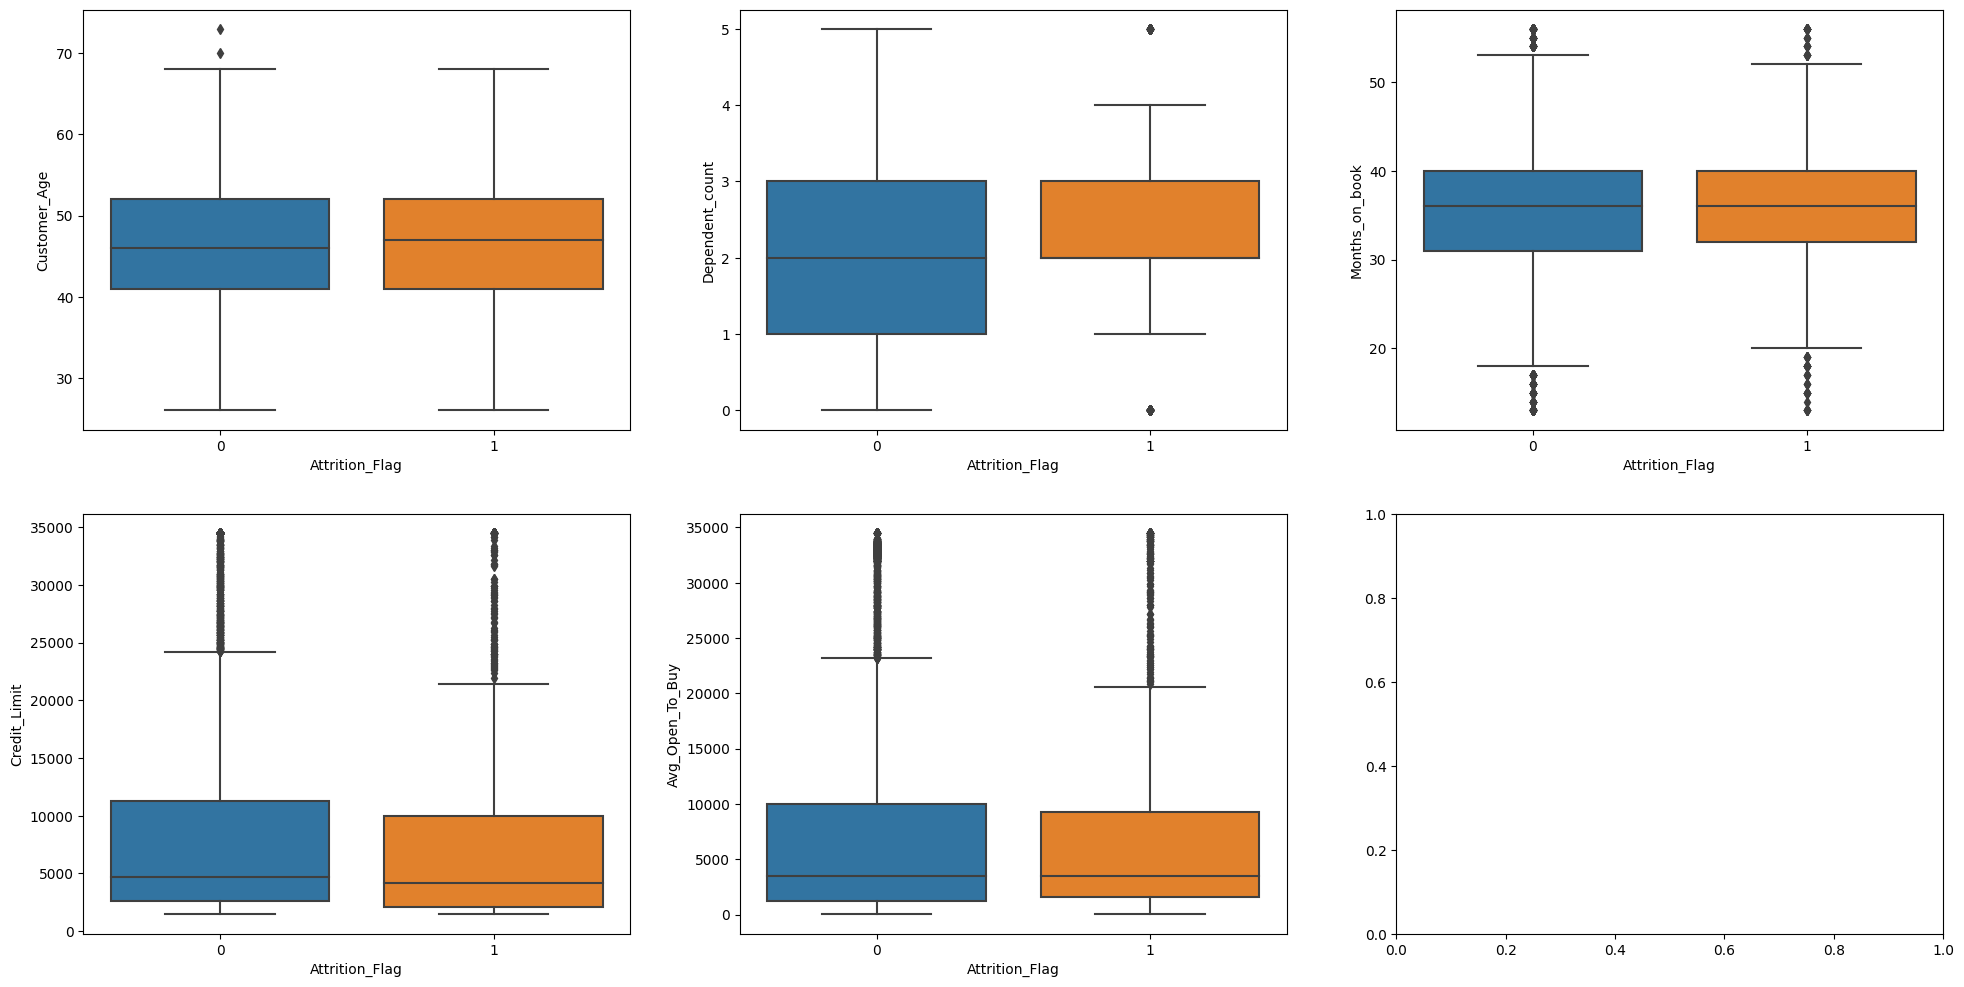

In [140]:
#box plot less correlation with target feature
fig,ax = plt.subplots(2,3,figsize=(24,12))
less_corr = ['Customer_Age','Dependent_count','Months_on_book','Credit_Limit','Avg_Open_To_Buy']
j = 0
for i in less_corr:
    sns.boxplot(data = numDF_target, x = target_name, y = i, ax=ax[floor(j/3)][j%3])
    j = j+1
plt.show()


From conducting Box plots of paired data with very low correlation with the target, to analyze the data division characteristics, it was found that the target class exhibits overlapping characteristics across all features. It is not possible to observe class division. Therefore, the author chooses to discard all these features.

5.) Joint plot (correlate feature) : 
Performing a plot to analyze the relationship characteristics of dividing the target of highly correlated data, in order to decide whether to discard the feature or not.

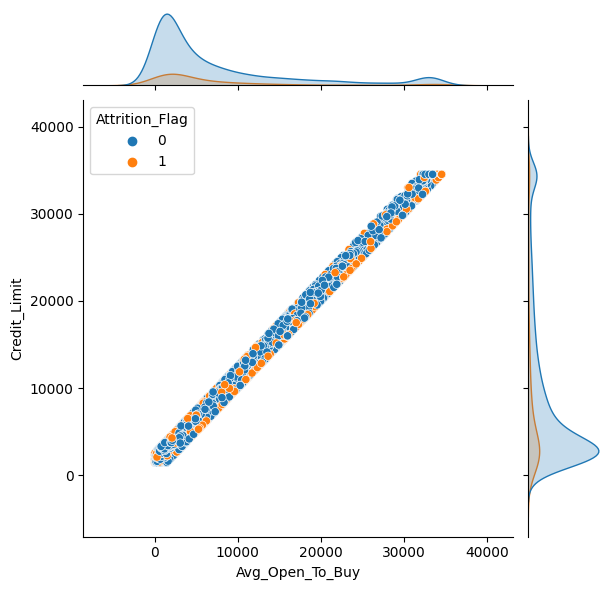

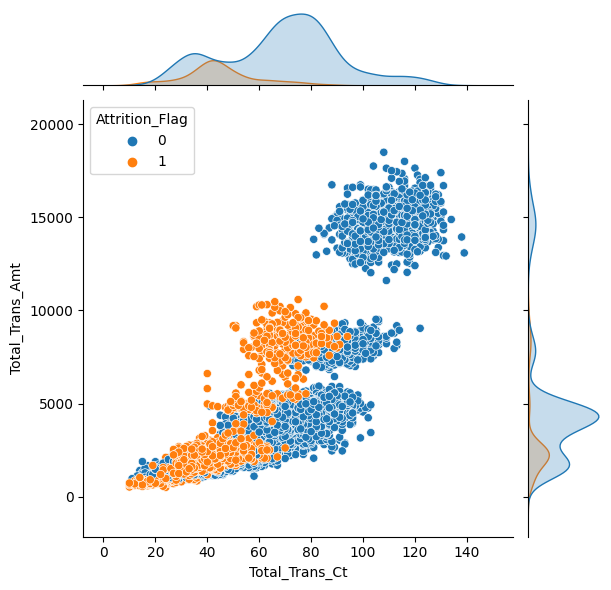

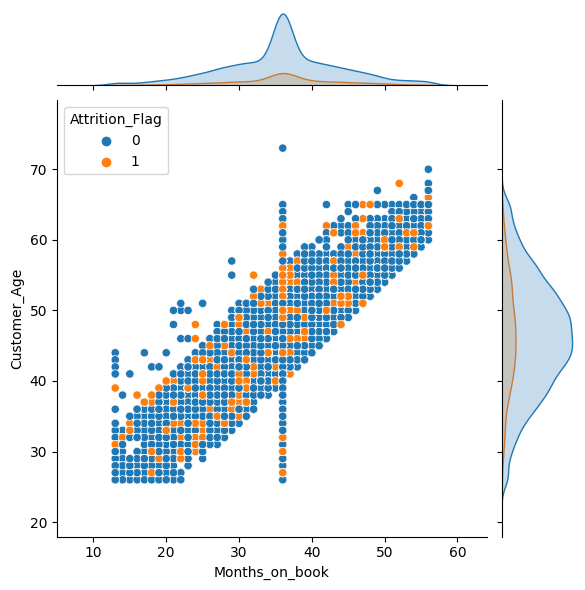

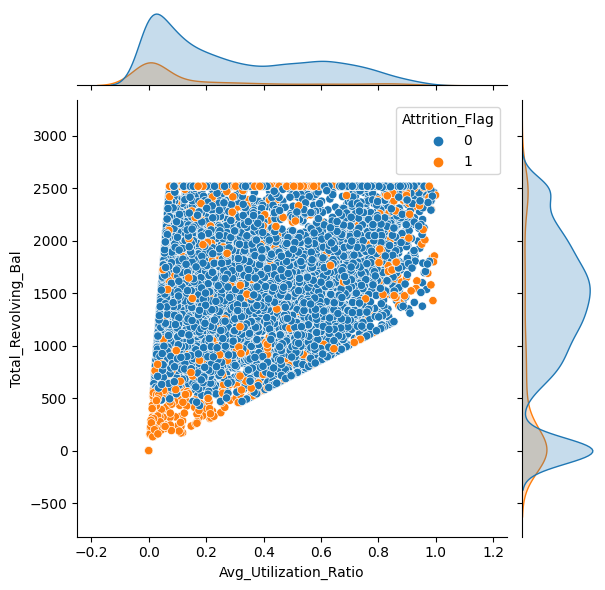

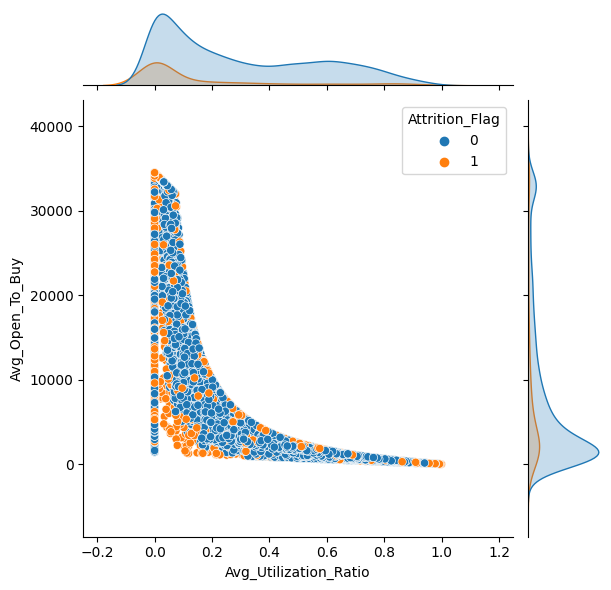

In [144]:
# joint plot most correlation feature
sns.jointplot(data = numDF_target, x = 'Avg_Open_To_Buy', y = 'Credit_Limit',hue=target_name)
sns.jointplot(data = numDF_target, x = 'Total_Trans_Ct', y = 'Total_Trans_Amt',hue=target_name)
sns.jointplot(data = numDF_target, x = 'Months_on_book', y = 'Customer_Age',hue=target_name)
sns.jointplot(data = numDF_target, x = 'Avg_Utilization_Ratio', y = 'Total_Revolving_Bal',hue=target_name)
sns.jointplot(data = numDF_target, x = 'Avg_Utilization_Ratio', y = 'Avg_Open_To_Buy',hue=target_name)


From conducting Joint plots of highly correlated paired data to analyze the data division characteristics, the following observations were made:

1. Credit_Limit & Avg_Open_To_Buy: The data exhibits a very similar relationship between these two features. Therefore, it is advisable to discard one feature. However, considering the low correlation of both features with the target, the decision is made to discard both features.

2. Total_Trans_Amt & Total_Trans_Ct: Both features demonstrate a clear class division of the target. Additionally, considering their high correlation with the target, both features are retained.

3. Customer_Age & Months_on_book: Similar to the previous case, these features exhibit a highly similar relationship. Thus, one feature should be discarded. However, since both features have low correlation with the target, both are discarded.

4. Total_Revolving_Bal & Avg_Utilization: These features also show a highly similar relationship. It's recommended to discard one feature. However, upon considering their correlation with the target, Total_Revolving_Bal has a high correlation, while Avg_Utilization has a low correlation. Therefore, Avg_Utilization is discarded.

5. Avg_Open_To_Buy & Avg_Utilization: These features exhibit a very similar relationship, and both were chosen to be discarded in a previous step.

Overall, the decision to discard or retain features is based on their correlation with the target variable and the clarity of the data division observed in the Joint plots.






6.) Count plot (catagorical) : 
To plot and examine the number of classes in each categorical feature to analyze the distribution of class proportions within each feature.

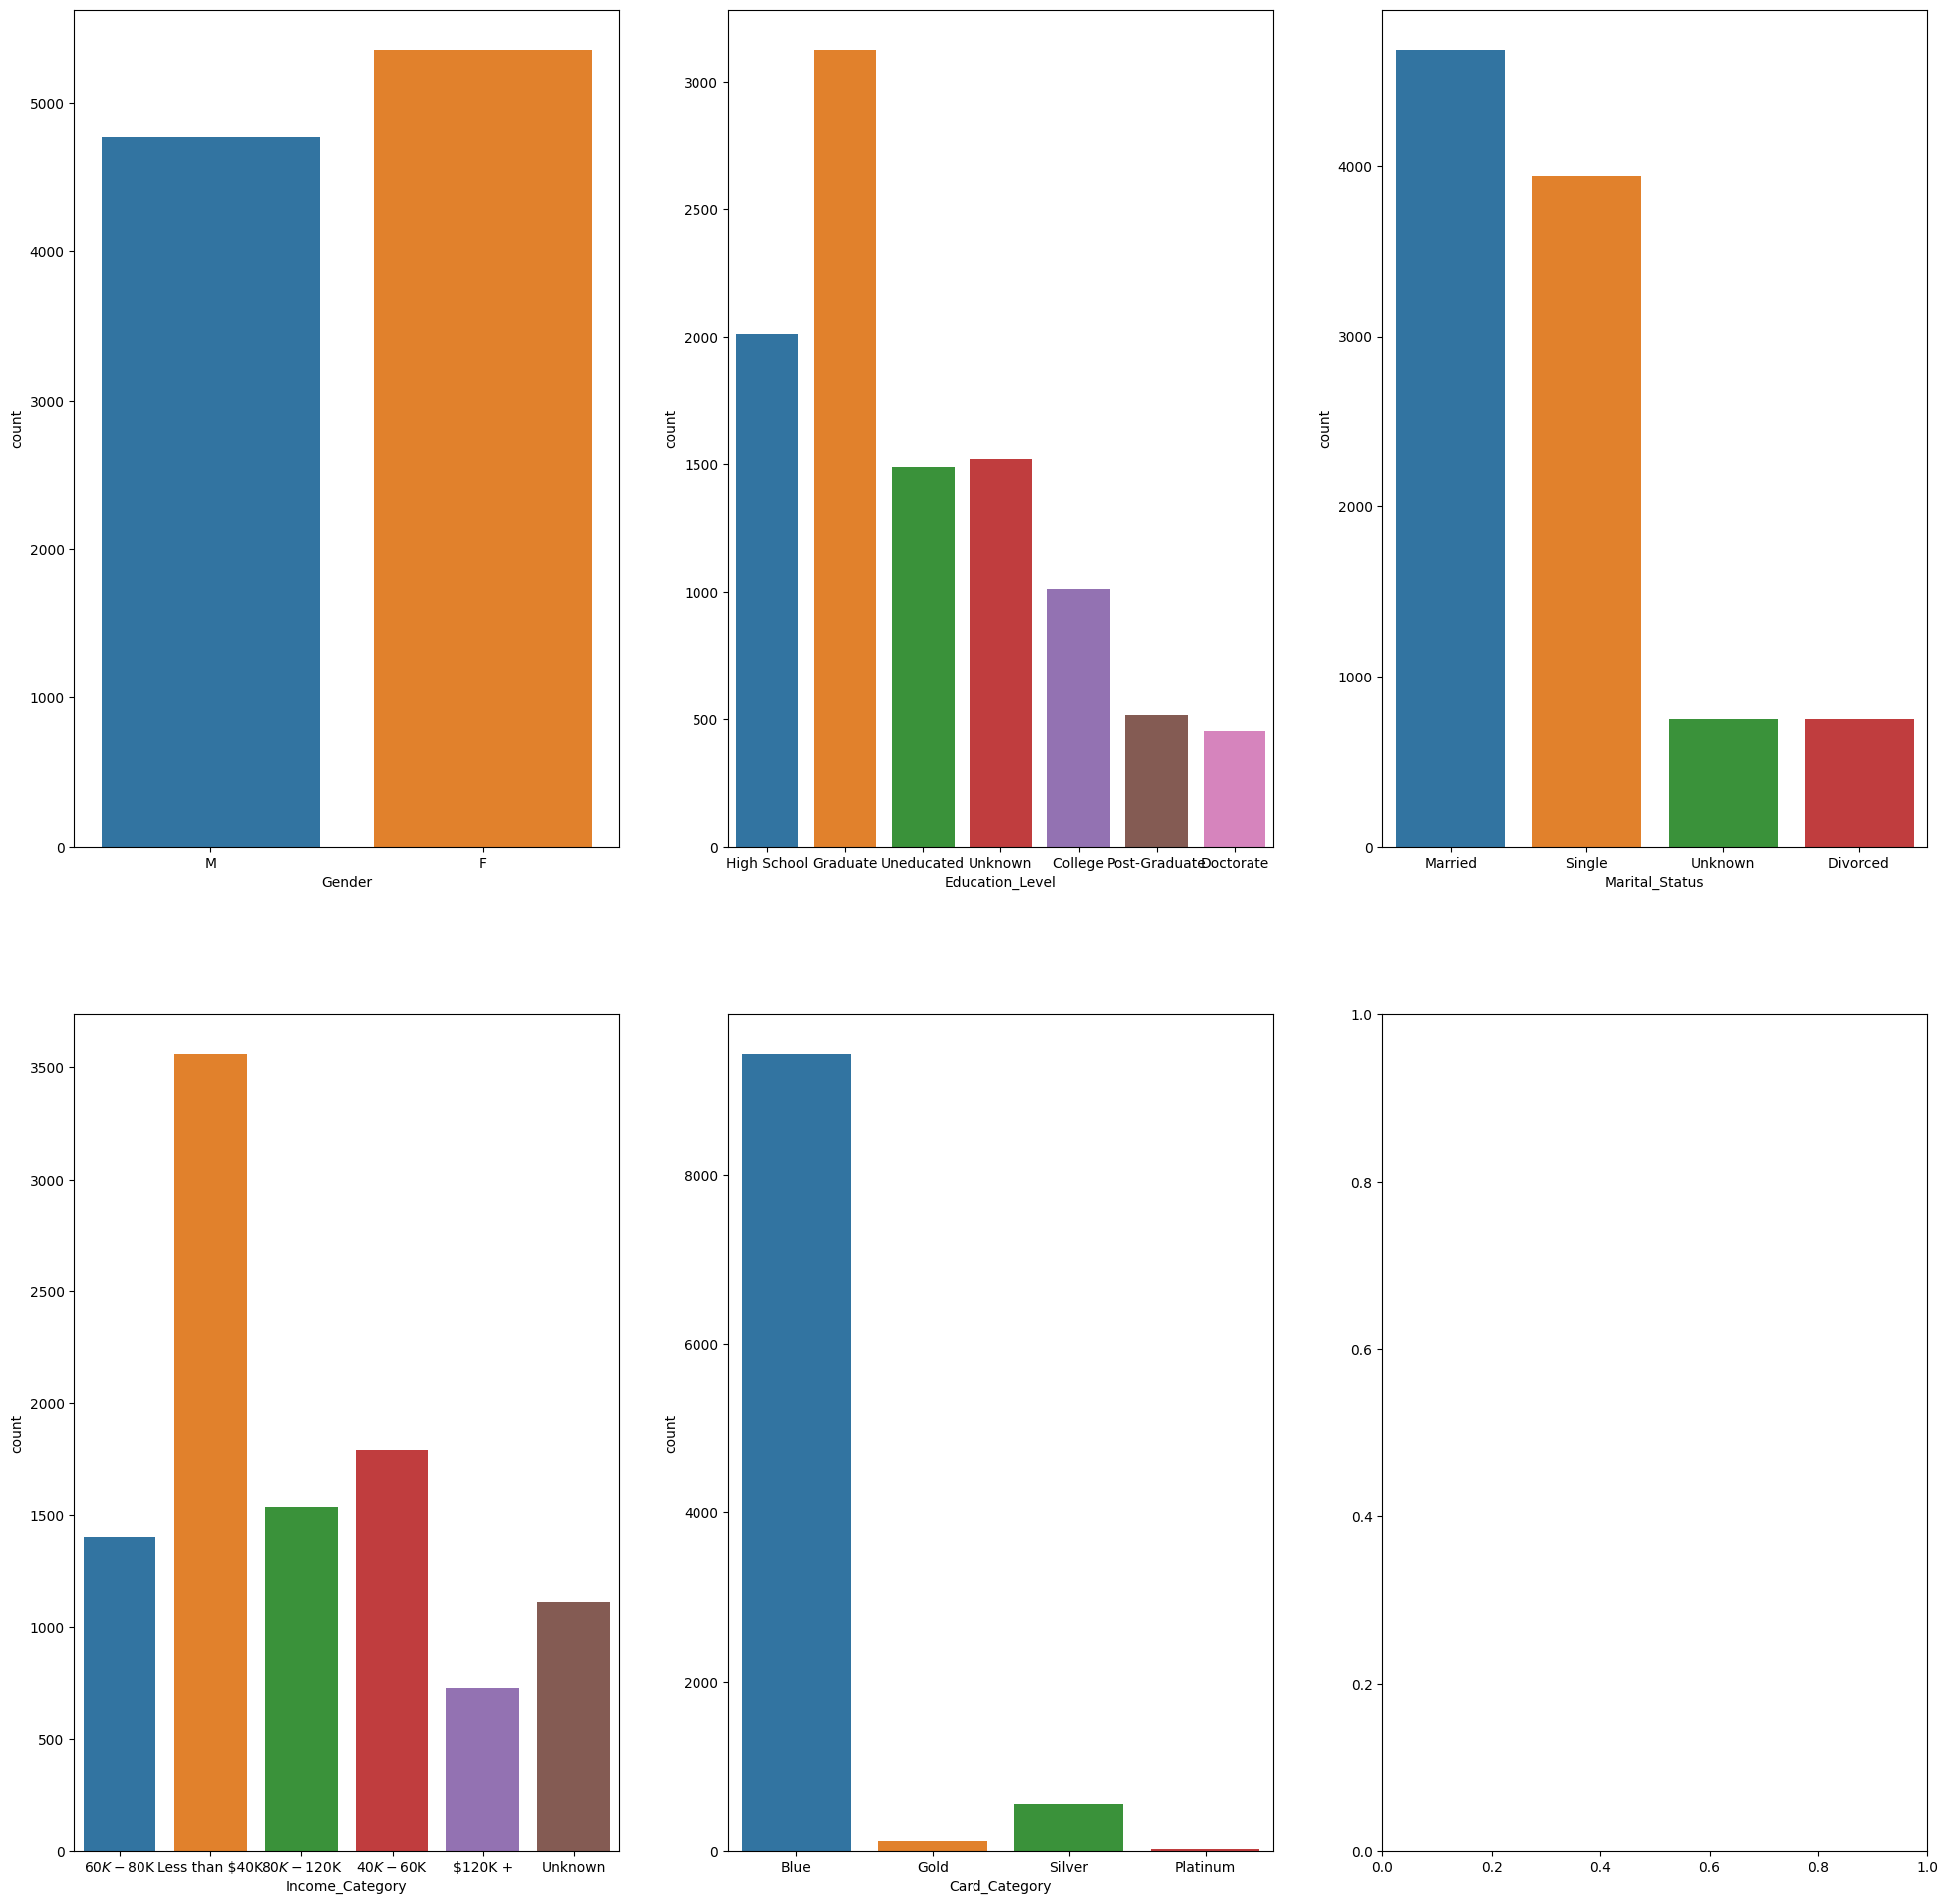

In [141]:
#count plot catagorical data
fig,ax = plt.subplots(2,3,figsize=(24,24))
col = catDF.columns
for i in range(0,5):
    sns.countplot(data = catDF,x = col[i],ax=ax[floor(i/3)][i%3])
plt.show()


From conducting count plots of categorical data, it's evident that most features have data proportions that are similar to each other. However, there is one feature, "Card_Category," where the data proportions are not similar. This is because almost all of the data belongs to the "Blue" class. The next step would be to analyze this further.

7.) Bar plot (catagorical) : 
To plot and examine the proportions of target class numbers within each categorical feature to analyze the distribution of target class proportions within each feature.

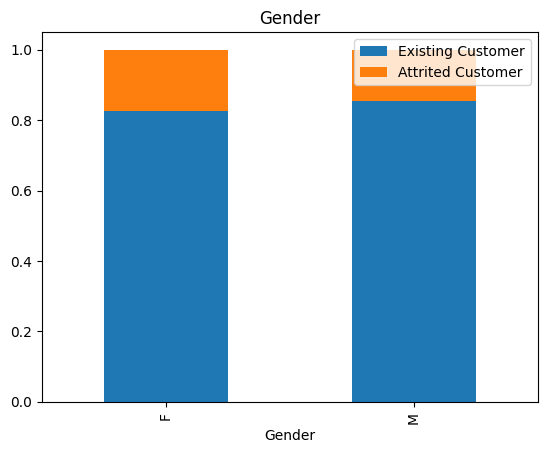

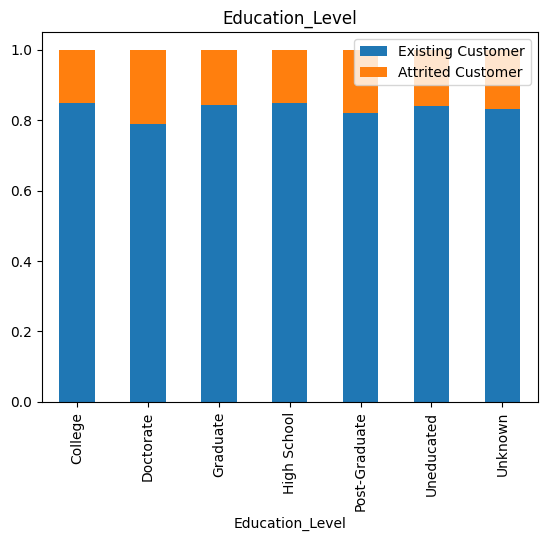

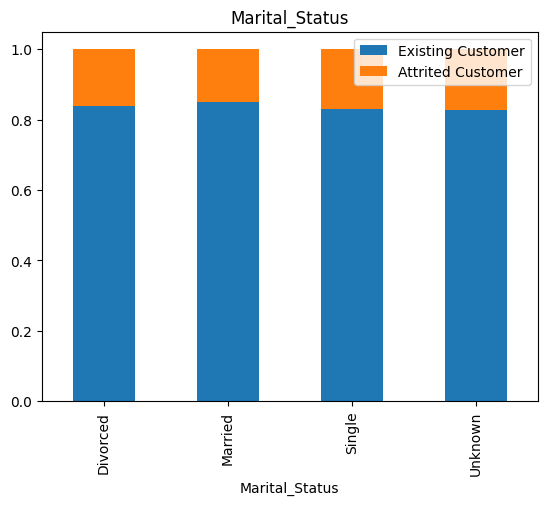

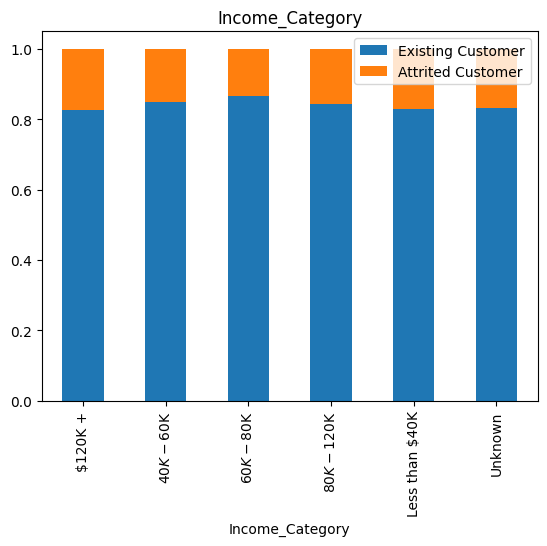

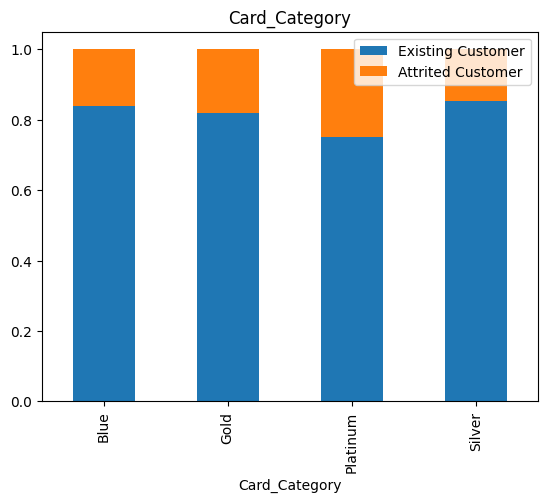

In [142]:
#bar plot catagorical data
for col in catDF:
        table=pd.crosstab(catDF[col],catDF_target[target_name])
        table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
        plt.title(col)
        plt.legend(['Existing Customer','Attrited Customer'])


From conducting bar plots of categorical data, it's evident that most features have target class proportions that are similar to each other, approximately 0.8 for "Existing Customer" and 0.2 for "Attrited Customer." This indicates that there isn't much variation in the classification of target classes within each categorical feature.

8.) count plot (target) : 
To plot and examine the proportions of target classes to assess whether there is class balance or not.

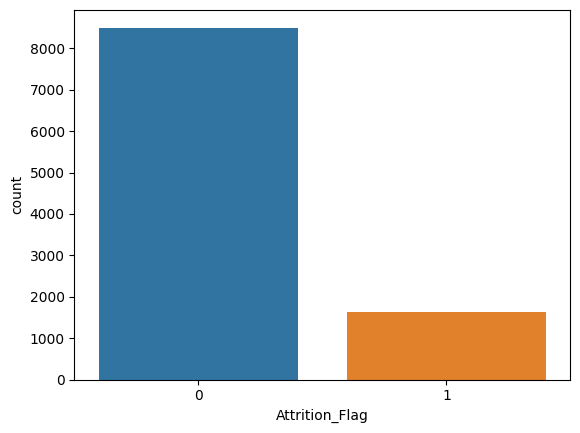

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [143]:
sns.countplot(data=rawDF,x=rawDF[target_name])
plt.show()
rawDF[target_name].value_counts()


From conducting a count plot of the target data, it is observed that the proportion of 'Existing Customer' to 'Attrited Customer' is approximately 0.8 to 0.2. This indicates that the dataset has an imbalanced target distribution.

9.) Heatmap correlation plot (all data) : 
First, one-hot encode the categorical data. Then, create a heatmap correlation plot to visualize the relationships between features and between features and the target, including both numeric and categorical features.

In [21]:
#one hot
onehotDF = pd.get_dummies(rawDF)
# onehotDF.info()

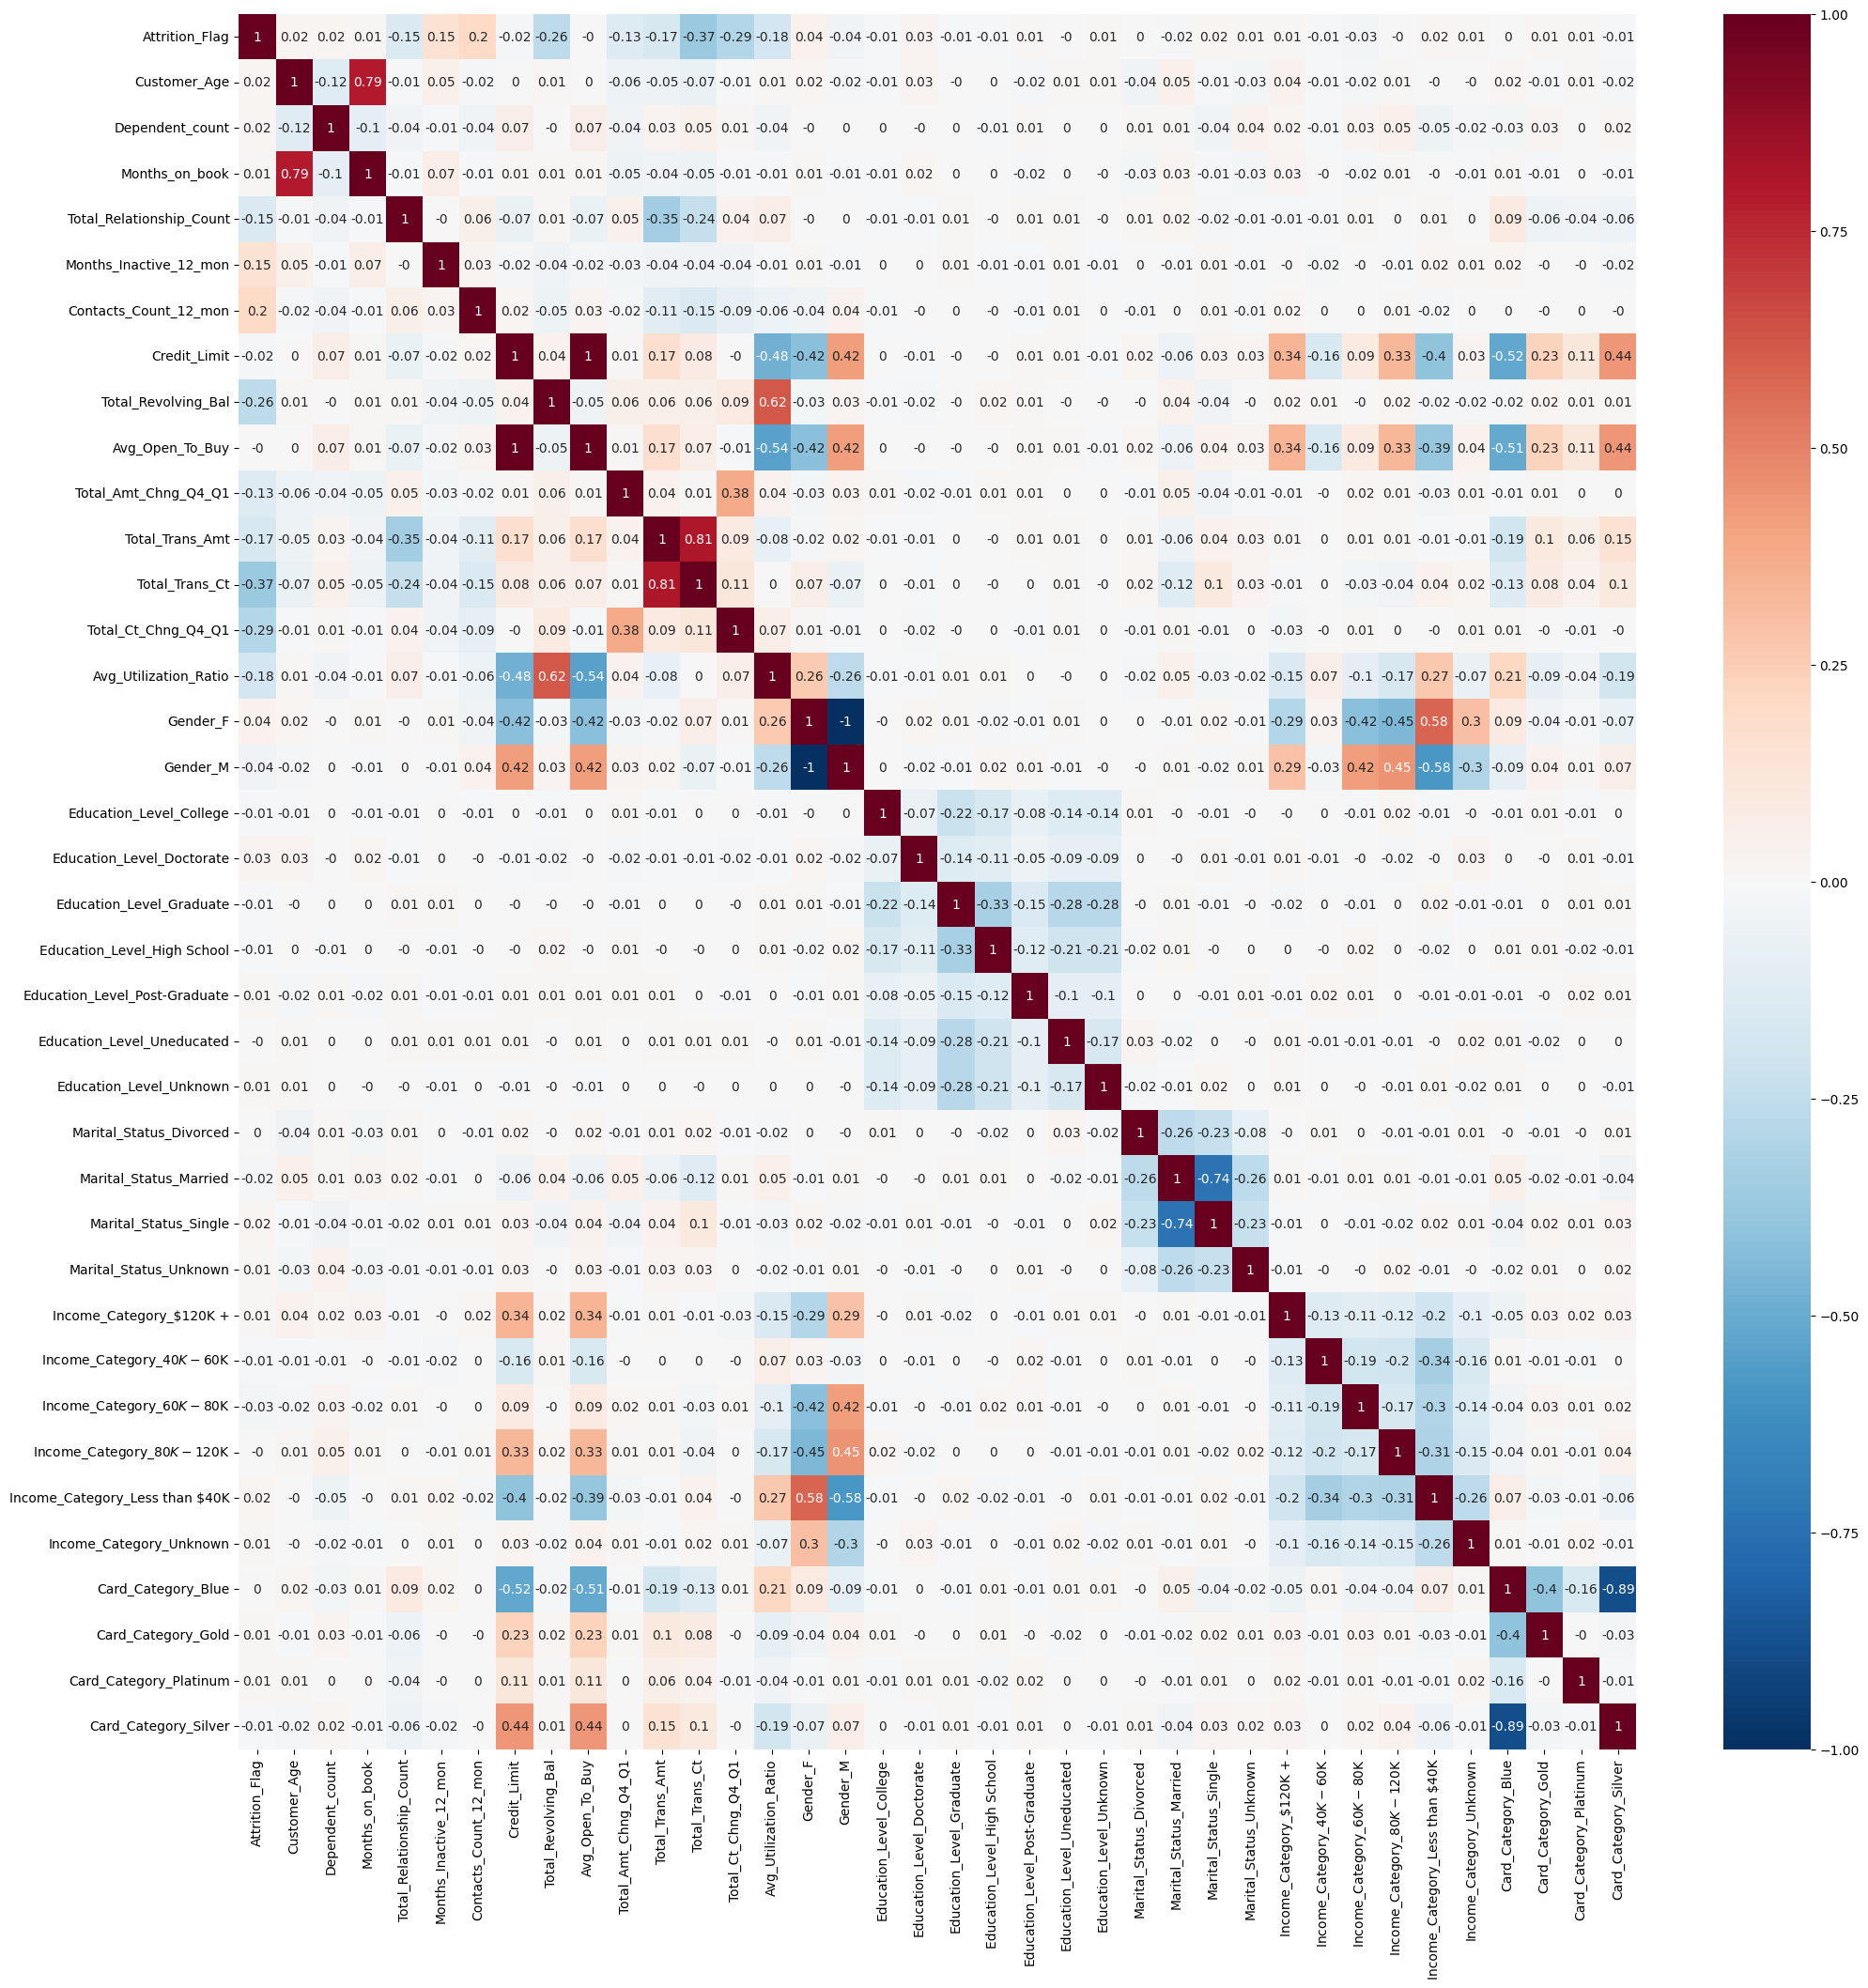

In [128]:
plt.figure(figsize = (24,24))
sns.heatmap(round(onehotDF.corr(),2),annot=True,cmap='RdBu_r')
plt.show()


From conducting the heatmap correlation plot to find the relationships between features and between features and the target, including both numeric and categorical features, it is observed that all categorical data have very low correlation values with the target (-0.04 < correlation < 0.04). Therefore, the decision is made to discard all categorical features.

## Data Exporation Summary


1. Good Characteristics of the Dataset:

- The dataset does not contain missing values.
- Most numerical data follow a normal distribution, with only 4 out of 14 features exhibiting a right-skewed distribution.
- The numerical data have a relatively clear class division of the target, making it easy to observe.

2. Poor Characteristics of the Dataset:

- The target variable of the dataset is imbalanced.
- Categorical features have very low correlation with the target, making it difficult to represent the division of target classes.
- There is a relatively large number of outliers in the dataset.

3. Hypotheses for Experimentation:

- Since categorical data cannot effectively represent the division of target classes, it is advisable to remove categorical data from the dataset to improve model performance.
- Numerical data with low correlation with the target (Customer_Age, Dependent_count, Months_on_book, Credit_Limit, Avg_Open_To_Buy) should be removed from the dataset to enhance model performance.
- The feature "Avg_Utilization_Ratio" has a strong correlation with "Total_Trans_Amt" but a weak correlation with the target. Therefore, it should be removed from the dataset to improve model performance.

## Data Preprocessing


- Missing Values: This dataset does not contain any missing values, but it includes a class labeled as 'unknown.' This class is considered to have a relationship with the target variable, so it is chosen not to be removed.

- Outliers: The decision is made not to remove outliers because doing so would result in a significant loss of data. Furthermore, observations of outliers in certain features provide valuable insights into their relationship with the target variable. For example, users of platinum cards are significantly fewer in number, which correlates with being the least represented class 'Attrited Customer.'

- Feature Selection: Features are selected based on data exploration and hypotheses for experimentation. Four datasets are created:

    1. df1: Original dataset without any additional feature removal from the initial selection.
    2. df2: Dataset containing only numerical data.
    3. df3: Dataset containing only numerical data with additional removal of features with low correlation with the target (Customer_Age, Dependent_count, Months_on_book, Credit_Limit, Avg_Open_To_Buy).
    4. df4: Subset of df3 with the additional removal of the feature Avg_Utilization_Ratio to test experimental hypotheses.

- One-Hot Encoding: Categorical data are one-hot encoded to be used with models in subsequent steps.

- Fix Skewed Data: Features with right-skewed distributions are adjusted to follow a normal distribution.

- Scaling Data: Data with different ranges are scaled to a uniform range.

- Data Splitting: Each dataset is split into 80% training and 20% testing data.

In [71]:
df1 = onehotDF.drop(columns=[target_name],axis=1)
df2 = numDF
df3 = df2.drop(columns=['Customer_Age','Dependent_count','Months_on_book','Credit_Limit','Avg_Open_To_Buy'],axis=1)
df4 = df2.drop(columns=['Customer_Age','Dependent_count','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Avg_Utilization_Ratio'],axis=1)


In [72]:
#fix skew
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
for i in ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt','Avg_Utilization_Ratio']:
    array = np.array(rawDF[i]).reshape(-1,1)
    df1[i] = qt.fit_transform(array)
    df2[i] = qt.fit_transform(array)
    df3[i] = qt.fit_transform(array)
    df4[i] = qt.fit_transform(array)

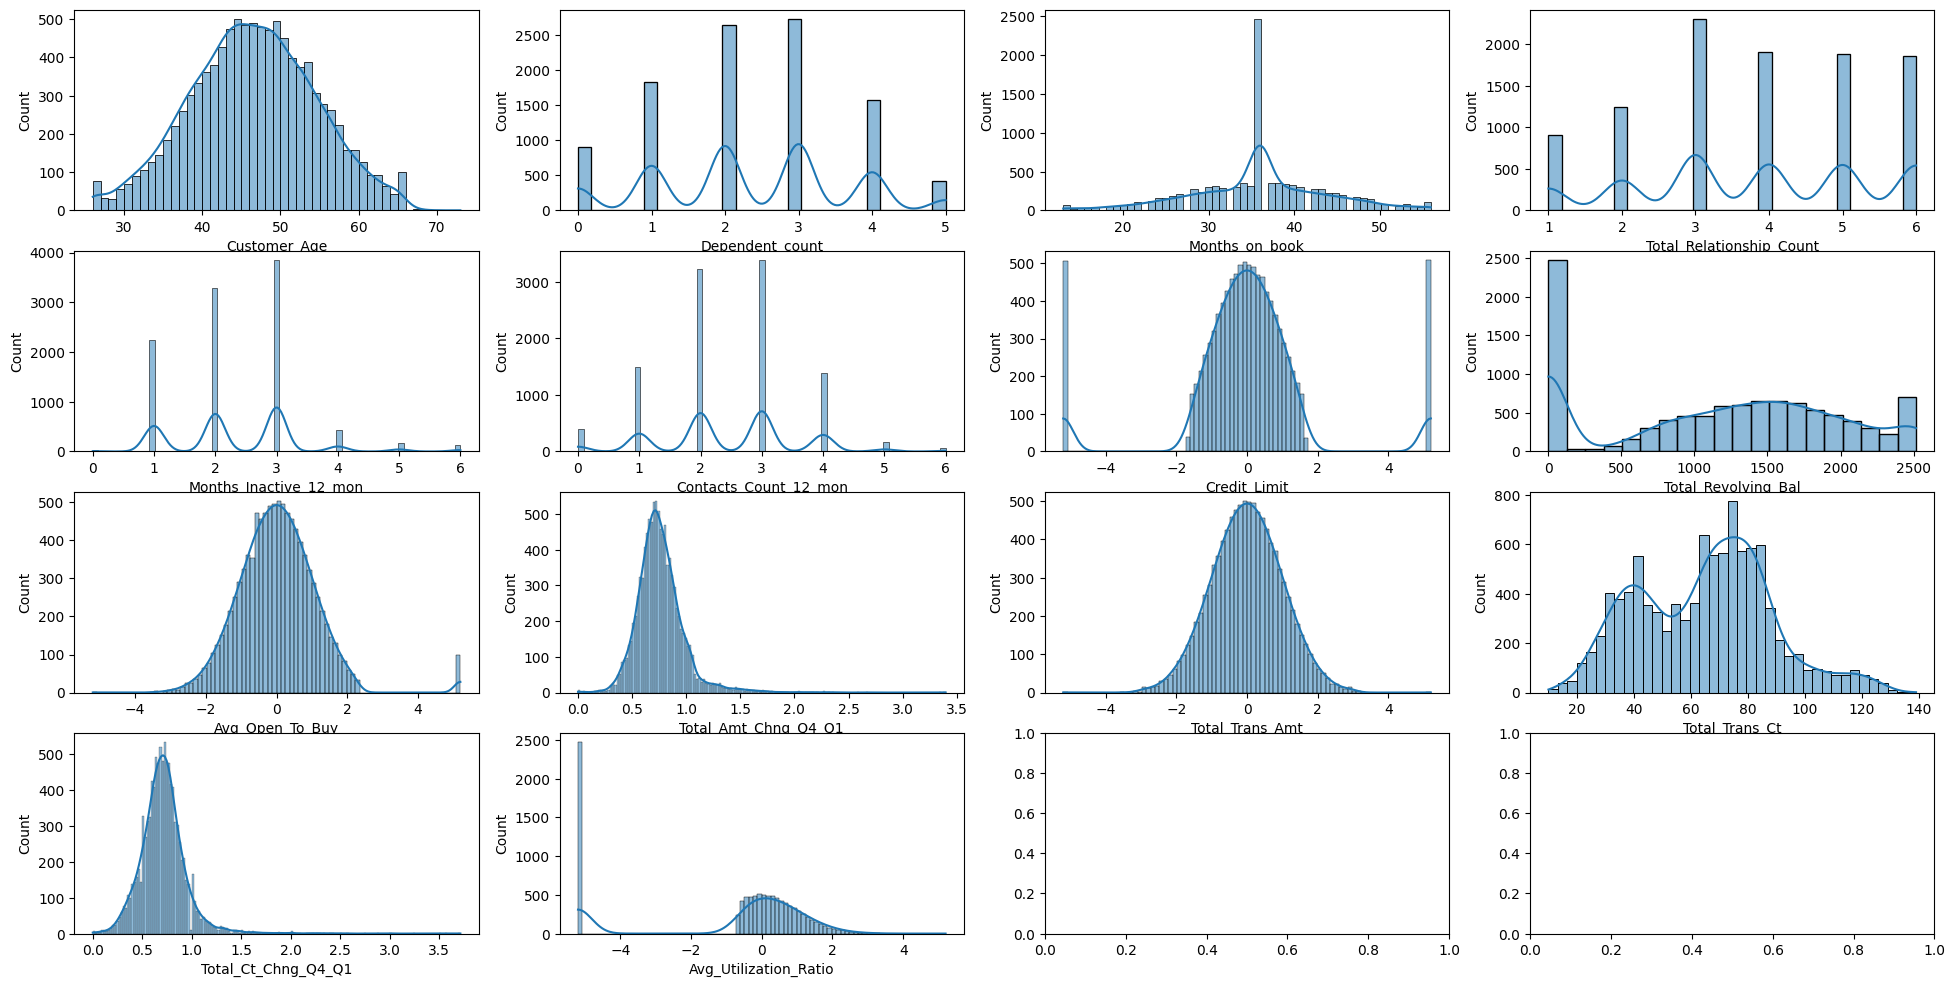

In [73]:
fig,ax = plt.subplots(4,4,figsize=(24,12))
col = df2.columns
for i in range(0,14): 
    sns.histplot(data = df2, x = col[i], kde = True,ax=ax[floor(i/4)][i%4])
plt.show()

In [74]:
scale = MinMaxScaler()
df1 = scale.fit_transform(df1)
df2 = scale.fit_transform(df2)
df3 = scale.fit_transform(df3)
df4 = scale.fit_transform(df4)
print(df1)
print(df2)
print(df3)
print(df4)

[[0.40425532 0.6        0.60465116 ... 0.         0.         0.        ]
 [0.4893617  1.         0.72093023 ... 0.         0.         0.        ]
 [0.53191489 0.6        0.53488372 ... 0.         0.         0.        ]
 ...
 [0.38297872 0.2        0.53488372 ... 0.         0.         0.        ]
 [0.08510638 0.4        0.53488372 ... 0.         0.         0.        ]
 [0.36170213 0.4        0.27906977 ... 0.         0.         1.        ]]
[[0.40425532 0.6        0.60465116 ... 0.24806202 0.43753366 0.45600172]
 [0.4893617  1.         0.72093023 ... 0.17829457 1.         0.4778253 ]
 [0.53191489 0.6        0.53488372 ... 0.07751938 0.6281637  0.        ]
 ...
 [0.38297872 0.2        0.53488372 ... 0.3875969  0.22024771 0.        ]
 [0.08510638 0.4        0.53488372 ... 0.40310078 0.19439957 0.        ]
 [0.36170213 0.4        0.27906977 ... 0.39534884 0.17474421 0.50383959]]
[[0.8        0.16666667 0.5        ... 0.45600172 0.5751709  0.57761491]
 [1.         0.16666667 0.33333333 ... 

In [86]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df1, rawDF_target, test_size = 0.2, random_state = 1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(df2, rawDF_target, test_size = 0.2, random_state = 1)
x_train3, x_test3, y_train3, y_test3 = train_test_split(df3, rawDF_target, test_size = 0.2, random_state = 1)
x_train4, x_test4, y_train4, y_test4 = train_test_split(df4, rawDF_target, test_size = 0.2, random_state = 1)

## Model construction and Analysist

### Experiment 1

To conduct the experiment, train models using all four datasets with both the K Nearest Neighbor and Decision Tree models to test the hypotheses regarding feature selection.

KNN Model

In [94]:
knn = KNeighborsClassifier() 
model_knn1 = knn.fit(x_train1,y_train1)
y_pred1 = model_knn1.predict(x_test1)
cf_matrix1=confusion_matrix(y_test1,y_pred1)
print("------------------------test1-------------------------")
print(classification_report(y_test1, y_pred1))
print(cf_matrix1)

model_knn2 = knn.fit(x_train2,y_train2)
y_pred2 = model_knn2.predict(x_test2)
cf_matrix2=confusion_matrix(y_test2,y_pred2)
print("------------------------test2-------------------------")
print(classification_report(y_test1, y_pred2))
print(cf_matrix2)

model_knn3 = knn.fit(x_train3,y_train3)
y_pred3 = model_knn3.predict(x_test3)
cf_matrix3=confusion_matrix(y_test3,y_pred3)
print("------------------------test3-------------------------")
print(classification_report(y_test3, y_pred3))
print(cf_matrix3)

model_knn4 = knn.fit(x_train4,y_train4)
y_pred4 = model_knn4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)

------------------------test1-------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1695
           1       0.53      0.29      0.38       331

    accuracy                           0.84      2026
   macro avg       0.70      0.62      0.64      2026
weighted avg       0.82      0.84      0.82      2026

[[1611   84]
 [ 235   96]]
------------------------test2-------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1695
           1       0.79      0.65      0.71       331

    accuracy                           0.91      2026
   macro avg       0.86      0.81      0.83      2026
weighted avg       0.91      0.91      0.91      2026

[[1639   56]
 [ 117  214]]
------------------------test3-------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1695
           1      

Dicision tree Model

In [97]:
tree = DecisionTreeClassifier(criterion='entropy')


model_tree1 = tree.fit(x_train1,y_train1)
y_pred=model_tree1.predict(x_train1)
cf_matrix=confusion_matrix(y_train1,y_pred)
print("------------------------train1-------------------------")
print(classification_report(y_train1, y_pred))
print(cf_matrix)
y_pred1 = model_tree1.predict(x_test1)
cf_matrix1=confusion_matrix(y_test1,y_pred1)
print("------------------------test1-------------------------")
print(classification_report(y_test1, y_pred1))
print(cf_matrix1)

model_tree2 = tree.fit(x_train2,y_train2)
y_pred=model_tree2.predict(x_train2)
cf_matrix=confusion_matrix(y_train2,y_pred)
print("------------------------train2-------------------------")
print(classification_report(y_train2, y_pred))
print(cf_matrix)
y_pred2 = model_tree2.predict(x_test2)
cf_matrix2=confusion_matrix(y_test2,y_pred2)
print("------------------------test2-------------------------")
print(classification_report(y_test2, y_pred2))
print(cf_matrix2)

model_tree3 = tree.fit(x_train3,y_train3)
y_pred=model_tree3.predict(x_train3)
cf_matrix=confusion_matrix(y_train3,y_pred)
print("------------------------train3-------------------------")
print(classification_report(y_train3, y_pred))
print(cf_matrix)
y_pred3 = model_tree3.predict(x_test3)
cf_matrix3=confusion_matrix(y_test3,y_pred3)
print("------------------------test3-------------------------")
print(classification_report(y_test3, y_pred3))
print(cf_matrix3)

model_tree4 = tree.fit(x_train4,y_train4)
y_pred=model_tree4.predict(x_train4)
cf_matrix=confusion_matrix(y_train4,y_pred)
print("------------------------train4-------------------------")
print(classification_report(y_train4, y_pred))
print(cf_matrix)
y_pred4 = model_tree4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)

------------------------train1-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

[[6805    0]
 [   0 1296]]
------------------------test1-------------------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1695
           1       0.82      0.83      0.83       331

    accuracy                           0.94      2026
   macro avg       0.89      0.90      0.90      2026
weighted avg       0.94      0.94      0.94      2026

[[1635   60]
 [  55  276]]
------------------------train2-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1    


From the experiment results:

- In the K Nearest Neighbor (KNN) model, the model from df2 performs better than the model from df1. Therefore, it can be concluded that removing categorical data improves the model's performance, aligning with the hypothesis.

- In the KNN model, the models from df3 and df4 yield similar results, which are better than the model from df2. Thus, it can be concluded that feature selection based on data analysis can improve the model's performance, supporting the hypothesis.

- In the Decision Tree model, the results from all four datasets are similar. This is because the Decision Tree model inherently selects features based on the information gain criterion, which may explain why there is no significant difference in performance across datasets.

Overall, the experiment results support the hypotheses regarding feature selection in improving model performance, particularly in the KNN models. However, the Decision Tree model's performance is consistent across datasets due to its inherent feature selection mechanism.


Therefore, the researcher has chosen to use df4 for further experimentation in the next steps.

### Experiment 2

Using df4, we will experiment with the K Nearest Neighbor, Decision Tree, Random Forest models both before and after hyperparameter tuning using grid search, as well as a Neural Network model, to analyze the results of each model.

KNN berfore tuning Hyper parameter

In [99]:
knn = KNeighborsClassifier() 
model_knn4 = knn.fit(x_train4,y_train4)
y_pred4 = model_knn4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)

------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1695
           1       0.82      0.69      0.75       331

    accuracy                           0.92      2026
   macro avg       0.88      0.83      0.85      2026
weighted avg       0.92      0.92      0.92      2026

[[1646   49]
 [ 103  228]]


KNN after tuning Hyper parameter

In [103]:
knn = KNeighborsClassifier() 
knn_para = {'n_neighbors':[3,4,5,6,7,8,9,10,12,14,16,18,20],'weights':['uniform','distance'],'algorithm':['auto']}
knn=GridSearchCV(estimator=knn, param_grid=knn_para,cv=5,scoring='f1')
model_knn4 = knn.fit(x_train4,y_train4)
y_pred4 = model_knn4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)
print("using %s" % ( knn.best_params_))

------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1695
           1       0.83      0.69      0.76       331

    accuracy                           0.93      2026
   macro avg       0.89      0.83      0.86      2026
weighted avg       0.92      0.93      0.92      2026

[[1649   46]
 [ 101  230]]
using {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}


Dicision Tree befor turning Hyper parameter

In [109]:
tree = DecisionTreeClassifier(criterion='entropy')

model_tree4 = tree.fit(x_train4,y_train4)
y_pred=model_tree4.predict(x_train4)
cf_matrix=confusion_matrix(y_train4,y_pred)
print("------------------------train4-------------------------")
print(classification_report(y_train4, y_pred))
print(cf_matrix)
y_pred4 = model_tree4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)

------------------------train4-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

[[6805    0]
 [   0 1296]]
------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1695
           1       0.83      0.78      0.81       331

    accuracy                           0.94      2026
   macro avg       0.90      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026

[[1643   52]
 [  72  259]]


Dicision Tree after turning Hyper parameter

In [127]:
tree = DecisionTreeClassifier(criterion='entropy',)
tree_para = {'criterion':['entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
tree=GridSearchCV(estimator=tree, param_grid=tree_para,cv=5)
model_tree4 = tree.fit(x_train4,y_train4)
y_pred=model_tree4.predict(x_train4)
cf_matrix=confusion_matrix(y_train4,y_pred)
print("------------------------train4-------------------------")
print(classification_report(y_train4, y_pred))
print(cf_matrix)
y_pred4 = model_tree4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)
print("using %s" % ( tree.best_params_))

------------------------train4-------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6805
           1       0.94      0.92      0.93      1296

    accuracy                           0.98      8101
   macro avg       0.96      0.95      0.96      8101
weighted avg       0.98      0.98      0.98      8101

[[6724   81]
 [ 104 1192]]
------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1695
           1       0.82      0.79      0.81       331

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026

[[1638   57]
 [  68  263]]
using {'criterion': 'entropy', 'max_depth': 9}


Random Forrest before turning Hyper parameter

In [111]:
forrest = RandomForestClassifier()
model_forrest4 = forrest.fit(x_train4,y_train4)
y_pred=model_forrest4.predict(x_train4)
cf_matrix=confusion_matrix(y_train4,y_pred)
print("------------------------train4-------------------------")
print(classification_report(y_train4, y_pred))
print(cf_matrix)
y_pred4 = model_forrest4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)

------------------------train4-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

[[6805    0]
 [   0 1296]]
------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1695
           1       0.91      0.84      0.87       331

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1667   28]
 [  53  278]]


Random Forrest after turning Hyper parameter

In [112]:
forrest = RandomForestClassifier()
forrest_para = {'n_estimators':[20,40,60,80,100,120,140,160,180,200,300,400],'criterion':['entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
forrest=GridSearchCV(estimator=forrest, param_grid=forrest_para,cv=5)
model_forrest4 = forrest.fit(x_train4,y_train4)
y_pred=model_forrest4.predict(x_train4)
cf_matrix=confusion_matrix(y_train4,y_pred)
print("------------------------train4-------------------------")
print(classification_report(y_train4, y_pred))
print(cf_matrix)
y_pred4 = model_forrest4.predict(x_test4)
cf_matrix4=confusion_matrix(y_test4,y_pred4)
print("------------------------test4-------------------------")
print(classification_report(y_test4, y_pred4))
print(cf_matrix4)
print("using %s" % ( forrest.best_params_))

------------------------train4-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6805
           1       1.00      1.00      1.00      1296

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

[[6805    0]
 [   0 1296]]
------------------------test4-------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1695
           1       0.92      0.85      0.88       331

    accuracy                           0.96      2026
   macro avg       0.94      0.92      0.93      2026
weighted avg       0.96      0.96      0.96      2026

[[1670   25]
 [  50  281]]
using {'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 140}


Neural network

In [120]:
modelNN = Sequential()
modelNN.add(Dense(2,input_shape=(x_train4.shape[1],), activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
historyNN = modelNN.fit(x_train4, y_train4, validation_data=(x_test4, y_test4), epochs=10,batch_size=1,verbose=1)

y_pred1 =  (modelNN.predict(x_train4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train4, y_pred=y_pred1))

y_pred1 =  (modelNN.predict(x_test4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test4, y_pred=y_pred1))

Neural network model
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 24        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8101/8101 [==============================] - 8s 965us/step - loss: 0.3688 - accuracy: 0.8536 - val_loss: 0.2937 - val_accuracy: 0.8914
Epoch 2/10
8101/8101 [==============================] - 8s 967us/step - loss: 0.2775 - accuracy: 0.8931 - val_loss: 0.2558 - val_accuracy: 0.9018
Epoch 3/10
8101/8101 [==============================] - 8s 988us/step - loss: 0.2572 - accuracy: 0.8953 - val_loss: 0.2344 - val_accuracy: 0.

In [124]:
modelNN = Sequential()
modelNN.add(Dense(10,input_shape=(x_train4.shape[1],), activation='relu'))
modelNN.add(Dense(8, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
historyNN = modelNN.fit(x_train4, y_train4, validation_data=(x_test4, y_test4), epochs=10,batch_size=1,verbose=1)

y_pred1 =  (modelNN.predict(x_train4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train4, y_pred=y_pred1))

y_pred1 =  (modelNN.predict(x_test4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test4, y_pred=y_pred1))

Neural network model
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                120       
                                                                 
 dense_24 (Dense)            (None, 8)                 88        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8101/8101 [==============================] - 9s 1ms/step - loss: 0.3087 - accuracy: 0.8778 - val_loss: 0.2703 - val_accuracy: 0.8949
Epoch 2/10
8101/8101 [==============================] - 8s 992us/step - loss: 0.2652 - accuracy: 0.8920 - val_loss: 0.2504 - val_accuracy: 0.9038
Epoch 3/

In [121]:
modelNN = Sequential()
modelNN.add(Dense(10,input_shape=(x_train4.shape[1],), activation='relu'))
modelNN.add(Dense(8, activation='relu'))
modelNN.add(Dense(5, activation='relu'))
modelNN.add(Dense(1, activation='sigmoid'))
print('Neural network model')
modelNN.summary()

modelNN.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
historyNN = modelNN.fit(x_train4, y_train4, validation_data=(x_test4, y_test4), epochs=10,batch_size=1,verbose=1)

y_pred1 =  (modelNN.predict(x_train4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_train4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_train4, y_pred=y_pred1))

y_pred1 =  (modelNN.predict(x_test4)>0.5).astype('int32')
print("Classification report of Neural network model\n=======================")
print(classification_report(y_true=y_test4, y_pred=y_pred1))
print("Confusion matrix of Neural network model\n=======================")
print(confusion_matrix(y_true=y_test4, y_pred=y_pred1))

Neural network model
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                120       
                                                                 
 dense_15 (Dense)            (None, 8)                 88        
                                                                 
 dense_16 (Dense)            (None, 5)                 45        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
8101/8101 [==============================] - 9s 1ms/step - loss: 0.3463 - accuracy: 0.8635 - val_loss: 0.2854 - val_accuracy: 0.8885
Epoch 2/10
8101/8101 [=

## Result Analysist

1. Based on data exploration, hypothesis setting for feature selection, and experimentation to test the hypotheses, the following conclusions can be drawn:

2. It is advisable to remove categorical features to improve model performance since all categorical features exhibit low capability in dividing target classes, as observed from graph analysis and correlation values.
Features such as Customer_Age, Dependent_count, Months_on_book, Credit_Limit, and Avg_Open_To_Buy should be removed to enhance model performance due to their low capability in dividing target classes, as observed from graph analysis and correlation values.
Decision Tree and Random Forest models do not require feature selection because they inherently select features based on information gain criteria for each feature.

3. The most suitable model for application is Random Forest because it has the highest recall value. This implies that the bank is more likely to encounter customers who are likely to cancel the bank's services. Therefore, the bank can better prepare to retain customers.